In [71]:
#import packages
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#np.random.seed(12345)

import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import initializers, regularizers
from tensorflow.keras import optimizers
from keras.utils.layer_utils import count_params
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.manifold import TSNE

In [72]:
data = 'DATA/data_t-SNE_310101_d5_R100_e1_N800.dat'
columns=['x1','x2','x3','x4','x5']

#df_raw will not contain labels
df_raw = pd.read_csv(data, delimiter='\t',header=None, names=columns)
N=len(df_raw)

df = df_raw.copy(deep=True)

label0 = np.full(int(N*0.1),0)
label1 = np.full(int(N*0.3),1)
label2 = np.full(int(N*0.6),2)
label = np.concatenate([label0,label1,label2])

#df will also contain labels
df['label'] = label

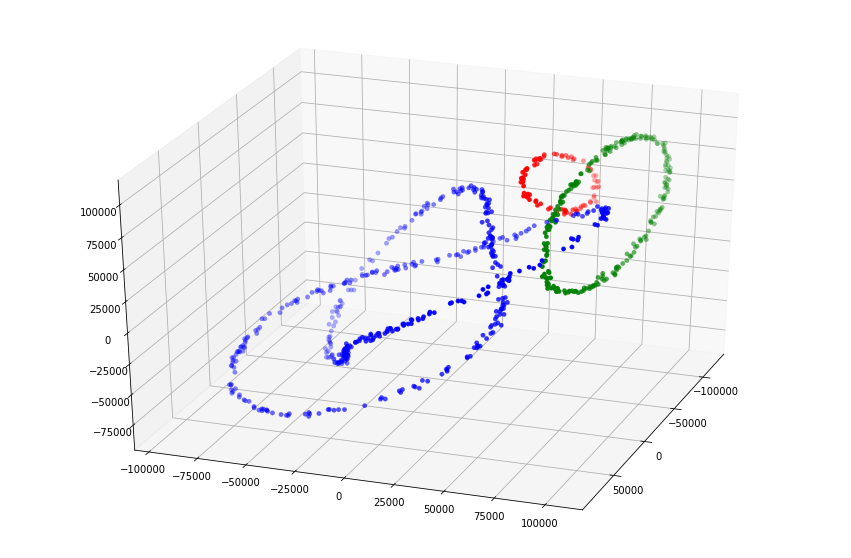

In [86]:
fig = plt.figure(figsize=(15,10))

red = df['label'] == 0
green = df['label'] == 1
blue = df['label'] == 2

ax = fig.gca(projection='3d')
ax.scatter(df[red]['x1'], df[red]['x2'], df[red]['x3'], c='red', linewidth=0.2)
ax.scatter(df[green]['x1'], df[green]['x2'], df[green]['x3'], c='green', linewidth=0.2)
ax.scatter(df[blue]['x1'], df[blue]['x2'], df[blue]['x3'], c='blue', linewidth=0.2)
ax.view_init(30, 20)
plt.show()
#funzia

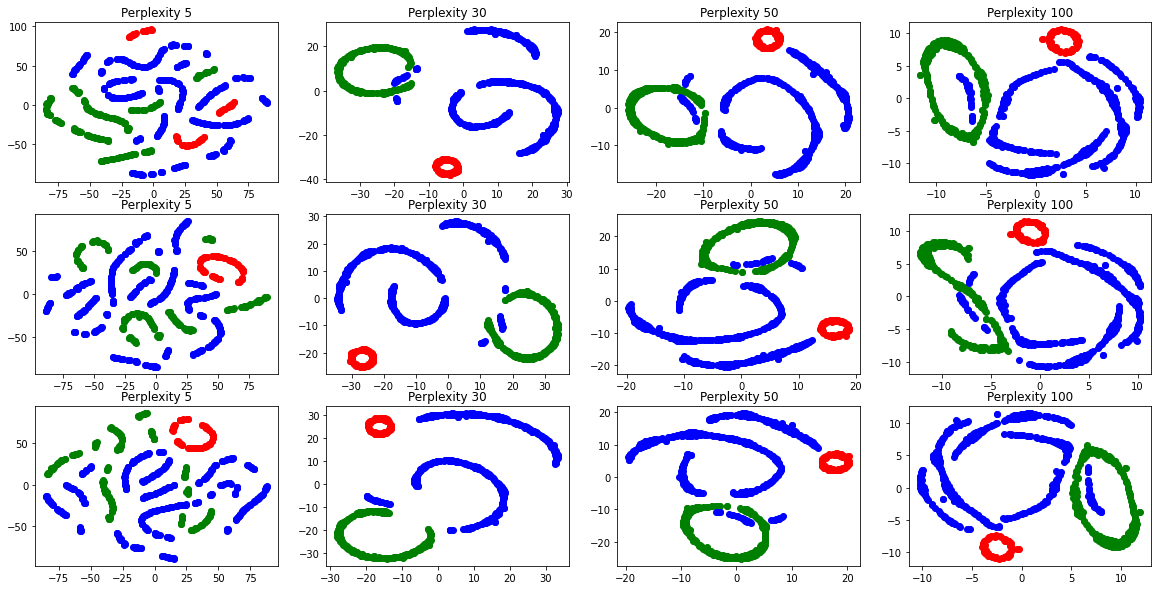

In [92]:
fig, ax = plt.subplots(3,4, figsize=(20,10))
perplexity_list = [5,30,50,100]

for i in range(len(perplexity_list)):
    X_embedded = TSNE(n_components=2,  perplexity=perplexity_list[i]).fit_transform(df)
    x = np.array([X_embedded[j][0] for j in range(X_embedded.shape[0])] )
    y = np.array([X_embedded[j][1] for j in range(X_embedded.shape[0])] )
    ax[0][i].set_title(f'Perplexity {perplexity_list[i]}')
    ax[0][i].scatter(x[red],y[red], color = 'red')
    ax[0][i].scatter(x[green],y[green], color = 'green')
    ax[0][i].scatter(x[blue],y[blue], color = 'blue')
for i in range(len(perplexity_list)):
    X_embedded = TSNE(n_components=2,  perplexity=perplexity_list[i]).fit_transform(df)
    x = np.array([X_embedded[j][0] for j in range(X_embedded.shape[0])] )
    y = np.array([X_embedded[j][1] for j in range(X_embedded.shape[0])] )
    ax[1][i].set_title(f'Perplexity {perplexity_list[i]}')
    ax[1][i].scatter(x[red],y[red], color = 'red')
    ax[1][i].scatter(x[green],y[green], color = 'green')
    ax[1][i].scatter(x[blue],y[blue], color = 'blue')
for i in range(len(perplexity_list)):
    X_embedded = TSNE(n_components=2,  perplexity=perplexity_list[i]).fit_transform(df)
    x = np.array([X_embedded[j][0] for j in range(X_embedded.shape[0])] )
    y = np.array([X_embedded[j][1] for j in range(X_embedded.shape[0])] )
    ax[2][i].set_title(f'Perplexity {perplexity_list[i]}')
    ax[2][i].scatter(x[red],y[red], color = 'red')
    ax[2][i].scatter(x[green],y[green], color = 'green')
    ax[2][i].scatter(x[blue],y[blue], color = 'blue')
plt.show()

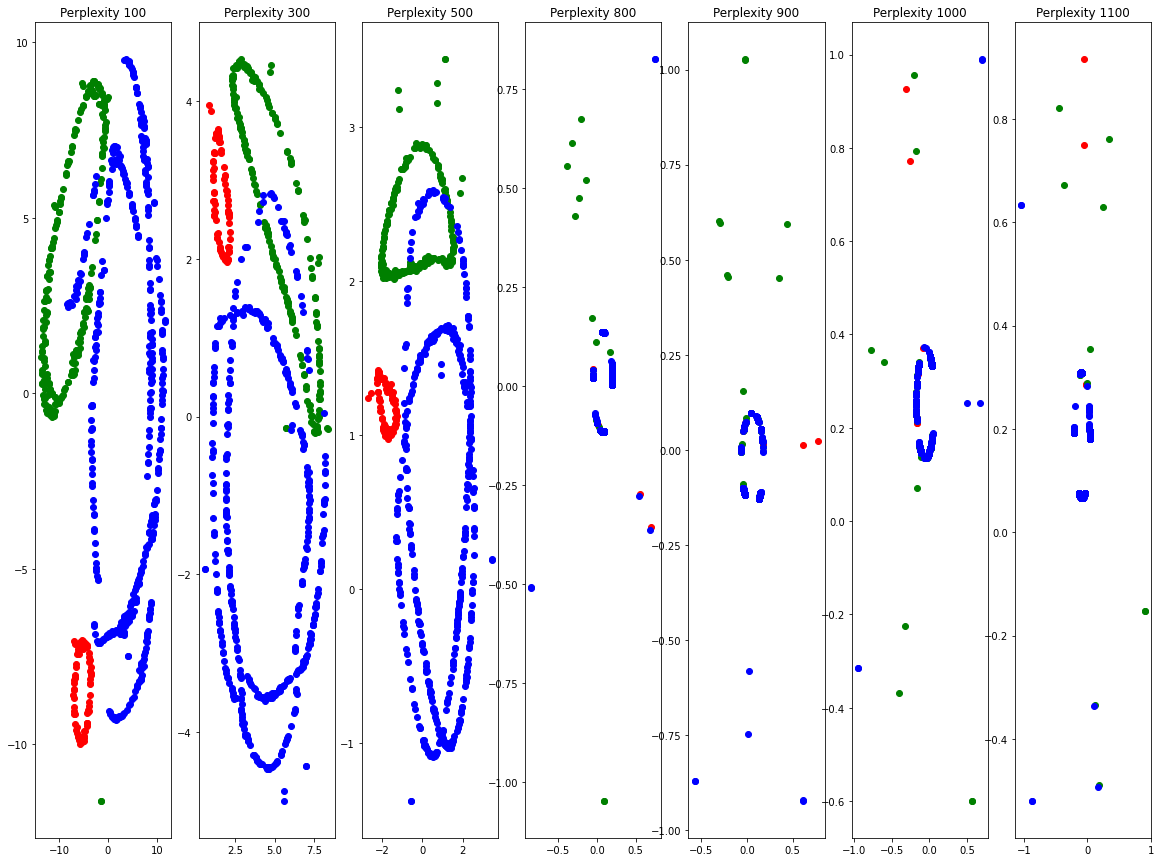

In [98]:
fig, ax = plt.subplots(1,7, figsize=(20,15))
perplexity_list = [100,300,500, 800, 900, 1000, 1100]

for i in range(len(perplexity_list)):
    X_embedded = TSNE(n_components=2,  perplexity=perplexity_list[i]).fit_transform(df)
    x = np.array([X_embedded[j][0] for j in range(X_embedded.shape[0])] )
    y = np.array([X_embedded[j][1] for j in range(X_embedded.shape[0])] )
    ax[i].set_title(f'Perplexity {perplexity_list[i]}')
    ax[i].scatter(x[red],y[red], color = 'red')
    ax[i].scatter(x[green],y[green], color = 'green')
    ax[i].scatter(x[blue],y[blue], color = 'blue')